# 2018-02-04 Malthusian

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# make sure graphs are displayed in main notebook
%matplotlib inline  

import numpy as np                 # make sure libraries are
import pandas as pd                #  in the namespace
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

plt.style.use('seaborn-whitegrid') # graphics setup
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 7
plt.rcParams["figure.figsize"] = figure_size

170.27893941


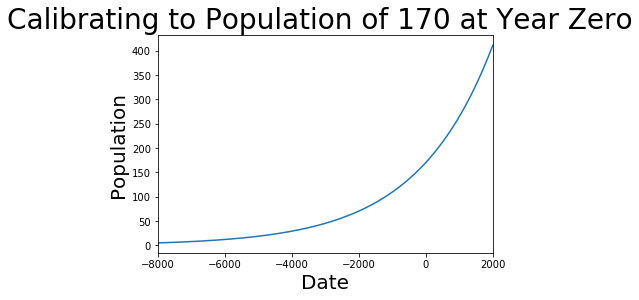

In [8]:
# basic Solow growth model run

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

alpha = 0.3                      
s = 0.1
delta = 0.03
g0 = 0.000 
n0 = 0.000441
N = 450*5
gamma = 3
h0=0.0001


array = np.zeros((1001,11))       

m_df = pd.DataFrame(array, 
    columns=["Year","Labor", "Capital", 
    "WEP", "YoverL", "Efficiency", "Pop_Gr", 
    "Eff_Gr", "Cap_Gr", "Cap_Out", "Human_Ideas"])

m_df.Year[0] = -8000
m_df.Labor[0] = 2.5
m_df.Human_Ideas[0] = 450
m_df.Efficiency[0] = ((N/m_df.Population[0])**(1/(1-gamma)) *
    (m_df.Human_Ideas[0])**(gamma/(1-gamma)))
m_df.Pop_Gr[0] = n0
m_df.Eff_Gr[0] = g0
m_df.Cap_Gr[0] = (s * m_df.WEP[0]/m_df.Capital[0] 
    - delta)
m_df.Cap_Out[0] = s/(n0+g0+delta)
m_df.WEP[0] = 3750
m_df.Capital[0] = m_df.Cap_Out[0] * m_df.WEP[0]
m_df.YoverL[0] = 750

for t in range(1, 1001):
    m_df.Year[t] = m_df.Year[t-1] + 10
    m_df.Population[t] = m_df.Population[t-1]*np.exp(n0*10)
    m_df.Capital[t] = (m_df.Capital[t-1] * 
        np.exp(m_df.Cap_Gr[t-1]*10))
    m_df.Efficiency[t] = m_df.Efficiency[t-1] * np.exp(g0*10)
    m_df.WEP[t] = m_df.Capital[t]**alpha * (m_df.Efficiency[t] *
        m_df.Population[t])**(1 - alpha)
    m_df.Living[t] = m_df.WEP[t]/m_df.Population[t]
    m_df.Pop_Gr[t] =  n0
    m_df.Eff_Gr[t] =  g0
    m_df.Cap_Gr[t] = s * m_df.WEP[t]/m_df.Capital[t] - delta

m_df = m_df.set_index("Year")
print(m_df.Population[0])

m_df.Population.plot()
plt.ylabel("Population", fontsize=20)   # set labels
plt.xlabel("Date", fontsize=20)
plt.suptitle("Calibrating to Population of 170 at Year Zero", 
    fontsize=28)

In [6]:
print(m_df.Population[0], "= model population at the founding of the Roman Empire")
print(m_df.Population[500], "= model population in 500 AD")
print(m_df.Population[1000], "= model population in 1000 AD")
print(m_df.Population[1500], "= model population in 1500 AD")
print(m_df.Population[1750], "= model population in 1750 AD")
print(m_df.Population[1500], "= model population in 1900 AD")
print(m_df.Population[1500], "= model population in 2000 AD")

170.27893941 = model population at the founding of the Roman Empire
212.286740947 = model population in 500 AD
264.657863961 = model population in 1000 AD
329.948939082 = model population in 1500 AD
368.406855271 = model population in 1750 AD
329.948939082 = model population in 1900 AD
329.948939082 = model population in 2000 AD


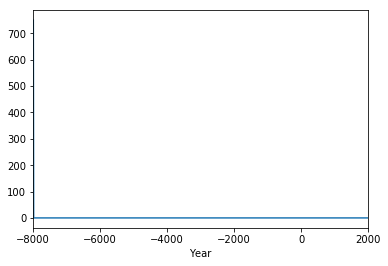

In [7]:
m_df.Living.plot()

### From Efficiency to Ideas

We have our production function, output as a function of the capital stock, the product of the labor force and the efficiency with which that labor can produce, and the single parameter $ \alpha $ describing how fast diminishing returns to capital set in as the capital-labor ratio increases:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^{\alpha}(EL)^{1-\alpha}  $

But what determines the efficiency of labor? Ideas, certainly—the level of technological knowledge in its society; its understanding and ability to implement productive organizations; plus the skills, education, and experience of the workforce. But Malthus's insight was that he needed to focus on the role of resources and, in particular, _resource scarcity_ in limiting the efficiency with which labor can work. Ideas, you see, are non-rival: that one person or group has and is using an idea does not mean another person or group cannot productively use the same idea. The same is not true of natural resources. Natural resources are _rival_: crowd twice as many farmers on the same soil, and their productive efficiency is likely to drop.

Thus we write the efficiency of labor as a function of society's level of ideas—technology; organizational capability; plus experience, skills, and education—which we will call H, non-rival, and of society's level of resources N divided by the labor force L:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ E = \left(\frac{N}{L}\right)^{\left(\frac{1}{1+\gamma}\right)}H^{\left(\frac{\gamma}{1+\gamma}\right)}  $

With the parameter $ \gamma $ describing the ratio of the salience of ideas compared to natural resources in generating production efficiency. Why the ratio—and thus all of the $ {\gamma}/(1-\gamma) $ terms? Because the ratio will be important in some formulas later on, so why not define our production function in terms of it at the start?

We thus gain an alternative formulation of the production function when we want to peel back _resource scarcity_ as an influence lowering the efficiency of labor E:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^{\alpha}N^{\left(\frac{1-\alpha}{1+\gamma}\right)}(HL)^{\left(\frac{\gamma(1-\alpha)}{1+\gamma}\right)}  $

We also note that that in this setup there is an interaction between the rate of growth of the labor force n and the rate of growth of the efficiency of labor g. Taking the natural log and then the derivative, we get expressions for the growth rate g of the efficiency of labor E:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{dln(E)}{dt} = 
\left(\frac{1}{1+\gamma}\right)
\left(\frac{dln(N)}{dt} - \frac{dln(L)}{dt} \right) +
\left(\frac{\gamma}{1+\gamma}\right)
\left(\frac{dln(H)}{dt}\right)  $

If natural resources are constant, this becomes:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{dln(E)}{dt} = 
\left(\frac{\gamma}{1+\gamma}\right)
\left(\frac{dln(H)}{dt}\right) -
\left(\frac{1}{1+\gamma}\right)
\left(\frac{dln(L)}{dt} \right) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g = \left(\frac{\gamma}{1+\gamma}\right)h - \left(\frac{1}{1+\gamma}\right)n  $

with "h" being the proportional rate of growth of the ideas—engineering technology; business and market organization; plus workers' skills, experience, and education—and g and n being, as before, the proportional rates of growth of labor efficiency and the labor force, respectively.

Faster population growth thus exerts a drag on the growth of the efficiency of labor...

We can have stagnant living standards if improvements in ideas or just offset by the effects of diminish natural resources per capita. But how likely is it that that just happens?

### Incorporating Natural Resource Scarcity

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^{\alpha}Y = K^{\alpha}(EL)^{1-\alpha} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} =
\left(\frac{K}{Y}\right)^\left(\frac{\alpha}{1-\alpha}\right)
E  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ E = \left(\frac{N}{L}\right)^{\left(\frac{1}{1+\gamma}\right)}H^{\left(\frac{\gamma}{1+\gamma}\right)}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = 
\left(\frac{K}{Y}\right) 
^\left(\frac{\alpha}{1-\alpha}\right) 
\left(\frac{N}{L}\right)^{\left(\frac{1}{1+\gamma}\right)}H^{\left(\frac{\gamma}{1+\gamma}\right)} $

And if the natural resource stock in the economy is constant,   
we might as well choose units that set it equal to 1:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right) =  \left(\frac{K}{Y}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}  H^{\left(\frac{\gamma}{1 + \gamma}\right)} L^{\left(-\frac{1}{1 + \gamma}\right)}  $

----

&nbsp;

### What If the Economy Is in a Steady-State with Output per Worker at "Subsistence"?

If:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \bar{y}  $ and $ \frac{K}{Y} = \frac{s}{n+g+\delta}  $

then:

$\frac{Y}{L} = \frac{K}{Y}^{\left(\frac{\alpha}{1-\alpha}\right)}E $

$\frac{Y}{L} = \frac{s}{n+g+\delta}^{\left(\frac{\alpha}{1-\alpha}\right)}E $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \bar{y}  \left(\frac{n+g+\delta}{s}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}  =  H^{\left(\frac{\gamma}{1 + \gamma}\right)} L^{\left(-\frac{1}{1 + \gamma}\right)}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ L^{\left(\frac{1}{1 + \gamma}\right)}\bar{y}  \left(\frac{n+g+\delta}{s}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}  =  H^{\left(\frac{\gamma}{1 + \gamma}\right)} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$  L = H^{\gamma} 
\left[
\left(\frac{1}{\bar{y}}\right)^{\left(1+\gamma\right)}
\left(\frac{s}{n+g+\delta}\right)^{\left(\frac{\alpha(1+\gamma)}{(1-\alpha)}\right)}
\right] $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{dln(L)}{dt} = {\gamma}\frac{dln(H )}{dt} = {\gamma}h $

We would not expect to see growth in ideas to show up as increases in output per worker levels if population growth is fast enough to keep increases in the economy's idea stock from showing up in increases in the efficiency of labor.

That rate of population growth is simply equal to $ \gamma $ times the proportional rate of increase in the idea stock.

----

&nbsp;

$\frac{\beta}{1-\beta} = \gamma $

$ \beta = \gamma - \gamma\beta $

$ \beta + \gamma\beta = \gamma  $

$ \beta(1 + \gamma) = \gamma  $

$ \beta = \frac{\gamma}{1 + \gamma}  $

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

alpha = 0.3                      
beta = 0.8
s = 0.1
delta = 0.03
LShare = beta - alpha
subsistence = 750

g0 = 0.000177            # efficiency of labor growth at 0.0177% per year


n0 = 0.000441            # population and labor force growth at 0.0441%/year


array = np.zeros((1001,9))       

m_df = pd.DataFrame(array, 
    columns=["Year","Population", "Capital", "WEP", "Living", "Efficiency", "Pop_Gr", "Eff_Gr", "Cap_Gr"])

m_df.Year[0] = -8000
m_df.Population[0] = 5
m_df.Living[0] = 750
m_df.WEP[0] = 3750
m_df.Capital[0] = (s/delta) * m_df.WEP[0]
m_df.Efficiency[0] = (m_df.WEP[0]**(1/(beta-alpha)) * 
    m_df.Population[0]**(-1) * m_df.Capital[0]**((-alpha)/(beta-alpha)))
m_df.Pop_Gr[0] = n0
m_df.Eff_Gr[0] = g0
m_df.Cap_Gr[0] = s * m_df.WEP[0]/m_df.Capital[0] - delta
g1 = np.log(m_df.WEP[0]/np.exp(1))

for t in range(1, 1001):
    m_df.Year[t] = m_df.Year[t-1] + 10
    m_df.Population[t] = m_df.Population[t-1]*np.exp(m_df.Pop_Gr[t-1]*10)
    m_df.Capital[t] = m_df.Capital[t-1] * np.exp(m_df.Cap_Gr[t-1]*10)
    m_df.Efficiency[t] = m_df.Efficiency[t-1] * np.exp(m_df.Eff_Gr[t-1]*10)
    m_df.WEP[t] = m_df.Capital[t]**alpha * (m_df.Efficiency[t] *
        m_df.Population[t])**(beta - alpha)
    m_df.Living[t] = m_df.WEP[t]/m_df.Population[t]
    m_df.Pop_Gr[t] = pi * np.log(m_df.Living[t]/subsistence) + n0
    m_df.Eff_Gr[t] = lambda_ * (np.log(m_df.WEP[t]) - g1) + g0
    m_df.Cap_Gr[t] = s * m_df.WEP[t]/m_df.Capital[t] - delta

m_df = m_df.set_index("Year")
print(m_df.Population[0])

m_df.Population.plot()
plt.ylabel("Population", fontsize=20)   # set labels
plt.xlabel("Date", fontsize=20)
plt.suptitle("Calibrating to Population of 170 at Year Zero", fontsize=28)

In [ ]:
m_df.Living.plot()
plt.ylabel("Living Standards", fontsize=20)   # set labels
plt.xlabel("Date", fontsize=20)
plt.suptitle("Calibrating to Population of 170 at Year Zero", fontsize=28)

## Malthusian Growth: Making Population Growth Responsive

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

alpha = 0.3                      
beta = 0.8
s = 0.1
delta = 0.03
LShare = beta - alpha
pi = .01                 # an e-fold increase in real income per capita to 2038 dollars/year
                         # raises population growth from 0 to 1% per year
subsistence = 750
lambda_ = 0.000085       # initial efficiency of labor growth at 0.0085% per year; each e-fold
                         # increase in world gdp raises efficiency of labor growth by an
                         # additional 0.0085% per year

n0 = 0.000
g0 = 0.000

array = np.zeros((1001,9))       

m_df = pd.DataFrame(array, 
    columns=["Year","Population", "Capital", "WEP", "Living", "Efficiency", "Pop_Gr", "Eff_Gr", "Cap_Gr"])

m_df.Year[0] = -8000
m_df.Population[0] = 5
m_df.Living[0] = 750
m_df.WEP[0] = 3750
m_df.Capital[0] = (s/delta) * m_df.WEP[0]
m_df.Efficiency[0] = (m_df.WEP[0]**(1/(beta-alpha)) * 
    m_df.Population[0]**(-1) * m_df.Capital[0]**((-alpha)/(beta-alpha)))
m_df.Pop_Gr[0] = n0
m_df.Eff_Gr[0] = g0
m_df.Cap_Gr[0] = s * m_df.WEP[0]/m_df.Capital[0] - delta
g1 = np.log(m_df.WEP[0]/np.exp(1))

for t in range(1, 1001):
    m_df.Year[t] = m_df.Year[t-1] + 10
    m_df.Population[t] = m_df.Population[t-1]*(1 + m_df.Pop_Gr[t-1])**10
    m_df.Capital[t] = m_df.Capital[t-1] * (1 + m_df.Cap_Gr[t-1])**10
    m_df.Efficiency[t] = m_df.Efficiency[t-1] * (1 + m_df.Eff_Gr[t-1])**10
    m_df.WEP[t] = m_df.Capital[t]**alpha * (m_df.Efficiency[t] *
        m_df.Population[t])**(beta - alpha)
    m_df.Living[t] = m_df.WEP[t]/m_df.Population[t]
    m_df.Pop_Gr[t] = pi * np.log(m_df.Living[t]/subsistence) + n0
    m_df.Eff_Gr[t] = lambda_ * (np.log(m_df.WEP[t]) - g1) + g0
    m_df.Cap_Gr[t] = s * m_df.WEP[t]/m_df.Capital[t] - delta

m_df = m_df.set_index("Year")

print(m_df.Population[0])
print(m_df.Pop_Gr[0])
print(m_df.Eff_Gr[0])
print(m_df.Efficiency[0])
print(" ")
print(m_df.Population[2000])
print(m_df.Pop_Gr[2000])
print(m_df.Eff_Gr[2000])
print(m_df.Efficiency[2000])

In [ ]:
m_df.plot()     # and graph

plt.ylabel("Value", fontsize=20)   # set labels
plt.xlabel("Time", fontsize=20)
plt.suptitle("Malthus", fontsize=28)

In [ ]:
m_df.Population.plot()

plt.ylabel("Population", fontsize=20)   # set labels
plt.xlabel("Date", fontsize=20)
plt.suptitle("Malthus: Population", fontsize=28)

In [ ]:
m_df.Living.plot()

plt.ylabel("Living Standards", fontsize=20)   # set labels
plt.xlabel("Date", fontsize=20)
plt.suptitle("Malthus: Living Standards", fontsize=28)

<https://github.com/braddelong/LSS18E101b/blob/master/2018-02-04_Malthusian.ipynb>

<http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=LSS18E101b&branch=master&path=2018-02-04_Malthusian.ipynb>



----

&nbsp;

----

&nbsp;

### From Efficiency to Ideas

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^{\alpha}(EL)^{1-\alpha}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ E = \left(\frac{N}{L}\right)^{(1-\beta)}H^{\beta}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^{\alpha}N^{(1 - \beta)(1-\alpha))}(HL)^{(\beta(1-\alpha))}  $

----

&nbsp;

### Incorporating Natural Resource Scarcity

$ Y = K^{\alpha}N^{(1 - \alpha - \beta(1-\alpha))}(HL)^{(\beta(1-\alpha))}  $

$ Y = K^{\alpha}(HL)^{(\beta(1-\alpha))}  $

$ \frac{Y}{L} = \left(\frac{K}{L}\right)^{\alpha}H^{(\beta(1-\alpha))}L^{(\beta(1-\alpha)+\alpha-1)}  $

$ \frac{Y}{L} = $
$ \left(\frac{Y}{L}\right)^{\alpha} $
$ \left(\frac{K}{Y}\right)^{\alpha} $
$ H^{(\beta(1-\alpha))} $
$ L^{(\beta(1-\alpha)+\alpha-1)}  $

$ \left(\frac{Y}{L}\right)^{1-\alpha} = $
$\left(\frac{K}{Y}\right)^{\alpha}H^{(\beta(1-\alpha))} $
$ L^{(\beta(1-\alpha)+\alpha-1)}  $

$ \left(\frac{Y}{L}\right) =  \left(\frac{K}{Y}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}  H^{\beta} L^{\beta-1}  $

And, of course, in the standard Solow setup $\beta = 1 $, so:

$ \left(\frac{Y}{L}\right) =   \left(\frac{K}{Y}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}  H $

----

&nbsp;

If $ \frac{Y}{L} = \bar{y}  $ and $ \frac{K}{Y} = \frac{s}{n+g+\delta}  $, then:

&nbsp;

$ \bar{y}  \left(\frac{n+g+\delta}{s}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}  =  H^{\beta} L^{\beta-1}  $

&nbsp;

$  L = H^{\left(\frac{\beta}{1-\beta}\right)} 
\left[
\left(\frac{1}{\bar{y}}\right)^{\left(\frac{1}{1-\beta}\right)}   
\left(\frac{s}{n+g+\delta}\right)^{\left(\frac{\alpha}{(1-\alpha)(1-\beta)}\right)}
\right] $

Think of $ \beta  $ as the relative salience of ideas compared to resources in determining the efficiency of labor. If ideas are much more important in per-worker output, small improvements in ideas will carry with them huge increases in population in a Malthusian régime. If not, not. 

----

&nbsp;